In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [4]:
df = pd.read_excel('cars.xlsx')

In [24]:
df['manufacturer'] = df['manufacturer'].astype(str)
df['model'] = df['model'].astype(str)
df['trans'] = df['trans'].astype(str)
df['drv'] = df['drv'].astype(str)
df['fl'] = df['fl'].astype(str)
df['class'] = df['class'].astype(str)

label_encoder = LabelEncoder()

df['manufacturer'] = label_encoder.fit_transform(df['manufacturer'])
df['model'] = label_encoder.fit_transform(df['model'])
df['trans'] = label_encoder.fit_transform(df['trans'])
df['drv'] = label_encoder.fit_transform(df['drv'])
df['fl'] = label_encoder.fit_transform(df['fl'])
df['class'] = label_encoder.fit_transform(df['class'])

df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,0,1,1.8,1999,4,3,1,18.0,29.0,3,1
1,0,1,1.8,1999,4,8,1,21.0,29.0,3,1
2,0,1,2.0,2008,4,9,1,20.0,31.0,3,1
3,0,1,2.0,2008,4,0,1,21.0,30.0,3,1
4,0,1,2.8,1999,6,3,1,16.0,26.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
229,11,18,2.0,2008,4,7,1,19.0,28.0,3,2
230,11,18,2.0,2008,4,9,1,21.0,29.0,3,2
231,11,18,2.8,1999,6,3,1,16.0,26.0,3,2
232,11,18,2.8,1999,6,8,1,18.0,26.0,3,2


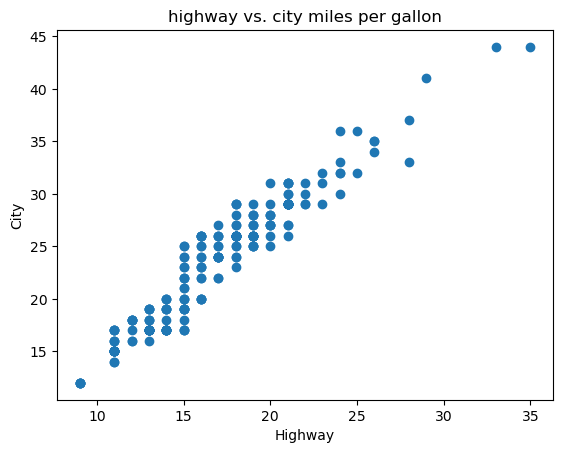

In [25]:
# 1. Relationship between highway and city miles per gallon
plt.scatter(x = 'cty', y = 'hwy',  data = df)

plt.title('highway vs. city miles per gallon')
plt.xlabel('Highway')
plt.ylabel('City')
plt.show()

In [61]:
# 2. Show distributions and scatters between all variables and the lowest and the highest correlation? 
correlation_matrix = df.corr()
correlation_matrix

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
manufacturer,1.000000,0.430202,-0.033582,-0.094973,-0.033461,0.034988,-4.794985e-02,0.071751,-0.031322,1.964915e-01,0.191555
model,0.430202,1.000000,0.149411,0.004558,0.114573,-0.067337,1.744933e-02,-0.119871,-0.145759,1.983747e-01,0.252764
displ,-0.033582,0.149411,1.000000,0.128547,0.931744,-0.218490,-4.772278e-02,-0.812594,-0.769741,-1.223601e-02,0.426556
year,-0.094973,0.004558,0.128547,1.000000,0.122245,0.129427,-1.294559e-02,-0.039814,-0.014702,-1.416599e-01,0.019372
cyl,-0.033461,0.114573,0.931744,0.122245,1.000000,-0.217402,-6.708588e-02,-0.804726,-0.763860,1.276698e-03,0.390096
trans,0.034988,-0.067337,-0.218490,0.129427,-0.217402,1.000000,3.830558e-02,0.267831,0.281631,-6.028152e-02,-0.233690
drv,-0.047950,0.017449,-0.047723,-0.012946,-0.067086,0.038306,1.000000e+00,0.315027,0.407870,-2.744625e-17,-0.276023
cty,0.071751,-0.119871,-0.812594,-0.039814,-0.804726,0.267831,3.150271e-01,1.000000,0.957549,-1.054949e-01,-0.434742
hwy,-0.031322,-0.145759,-0.769741,-0.014702,-0.763860,0.281631,4.078699e-01,0.957549,1.000000,-1.294108e-01,-0.550473
fl,0.196492,0.198375,-0.012236,-0.141660,0.001277,-0.060282,-2.744625e-17,-0.105495,-0.129411,1.000000e+00,0.098274


<Axes: >

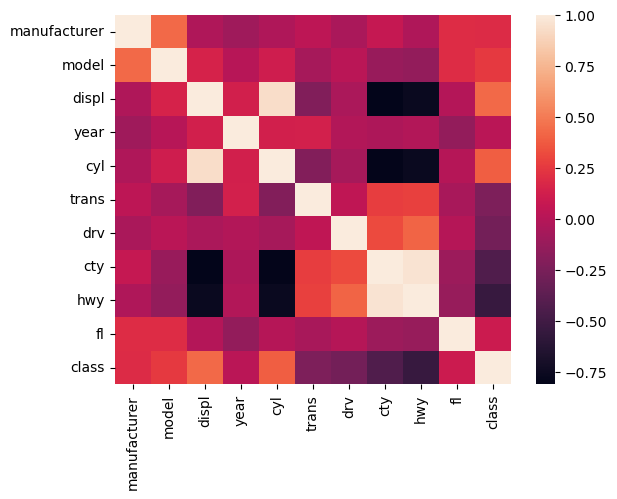

In [31]:
sns.heatmap(df.corr())

C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


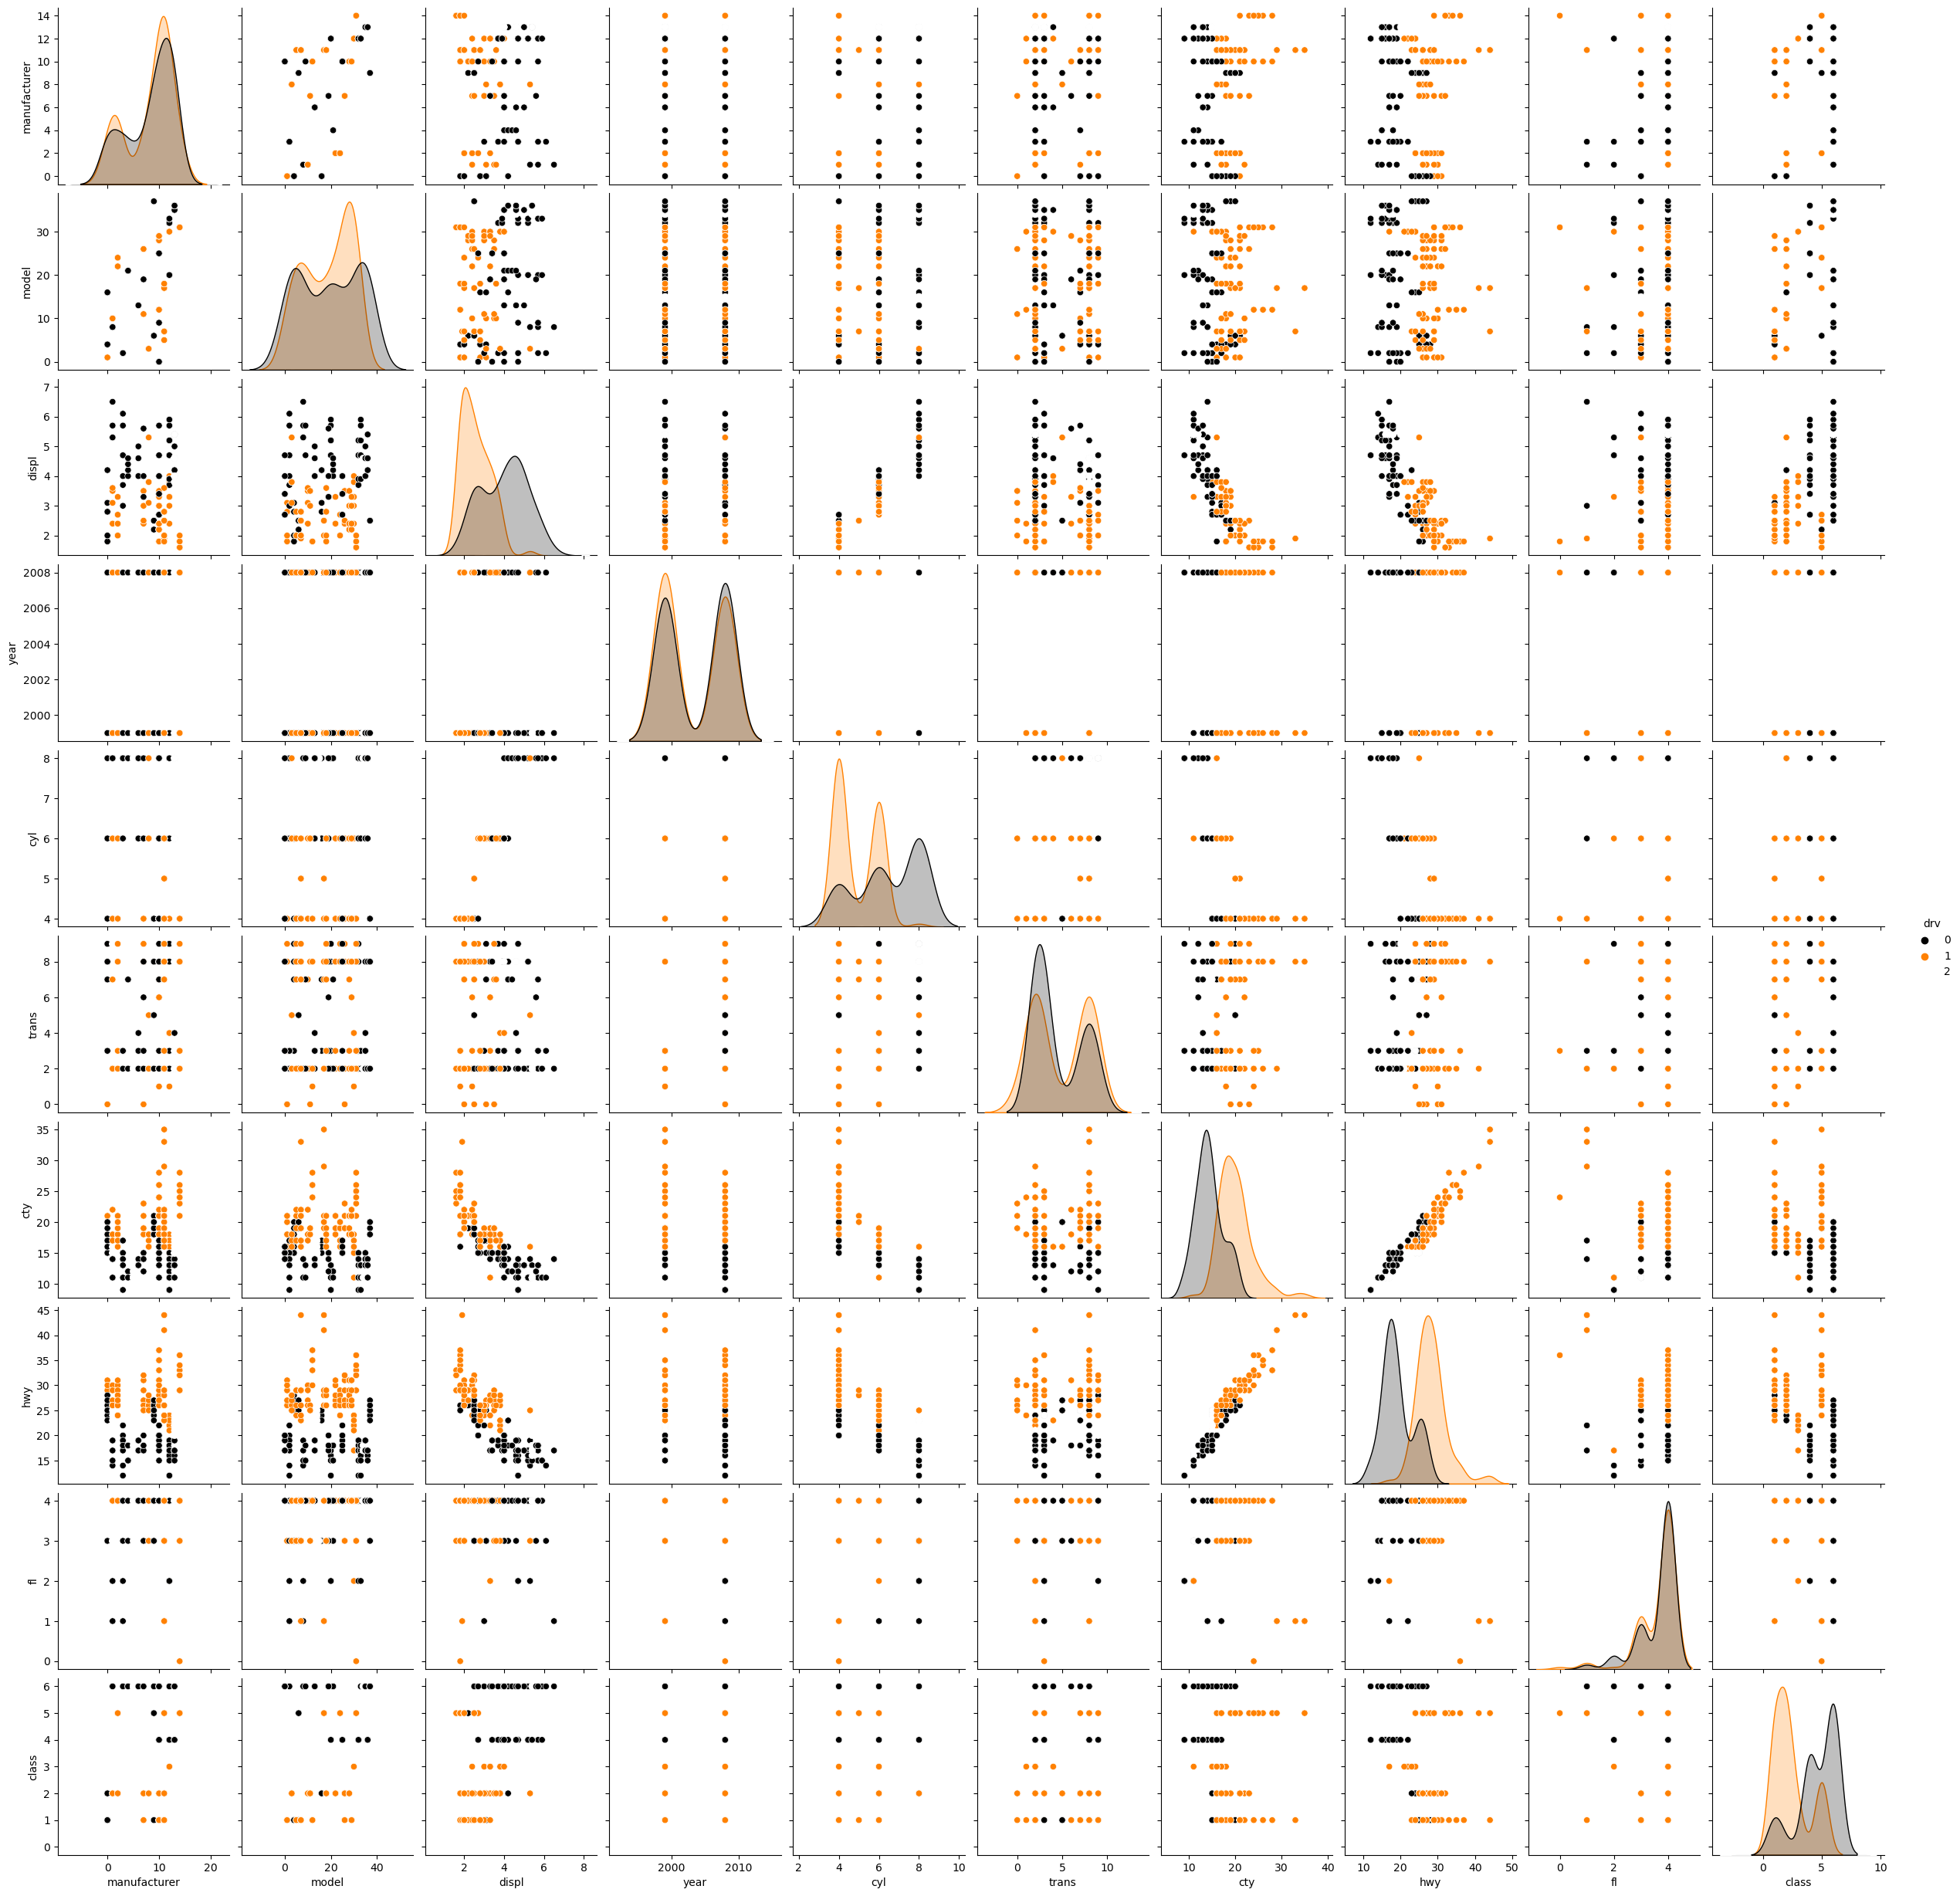

In [32]:
sns.pairplot(df,hue='drv',palette='afmhot')

In [53]:
correlation_matrix = correlation_matrix.unstack()

In [57]:
lst = []
for i in correlation_matrix:
    if i > 0.7 and i != 1:
        lst.append(i)
    elif i < -0.5:
        lst.append(i)

In [59]:
series = pd.Series(lst)

series = series.drop_duplicates()
unique_list = series.tolist()
unique_list.sort()
unique_list

[-0.8125943589731913,
 -0.8047260677795307,
 -0.7697410545665135,
 -0.763860406895643,
 -0.5504729247438344,
 0.9317443278771171,
 0.9575491716182177]

In [60]:
print("The Lowest Correlation:", unique_list[0])
print("The Highest Correlation:", unique_list[-1])

The Lowest Correlation: -0.8125943589731913
The Highest Correlation: 0.9575491716182177


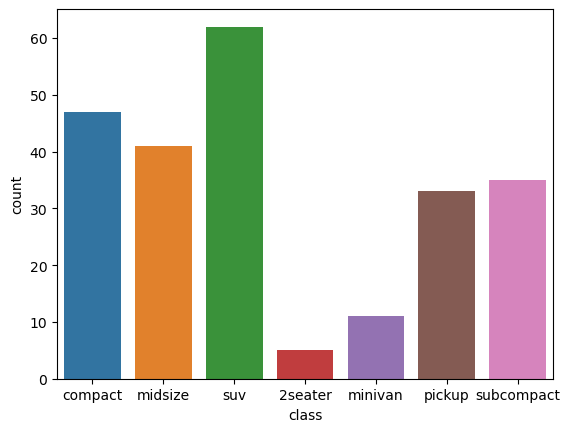

In [63]:
# 3. Which type of car is most frequent in dataset?
df1 = pd.read_excel('cars.xlsx')
sns.countplot(x ='class', data = df1)
plt.show()

<BarContainer object of 234 artists>

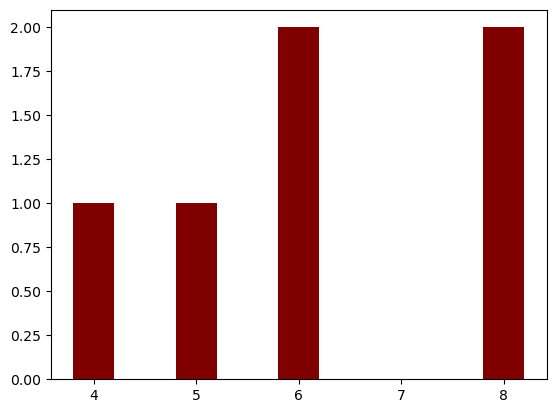

In [69]:
# 4. number of cylinders for each drive train in bar chart
cylinders = df["cyl"]
drv = df["drv"]
plt.bar(cylinders, drv, color ='maroon', width = 0.4)

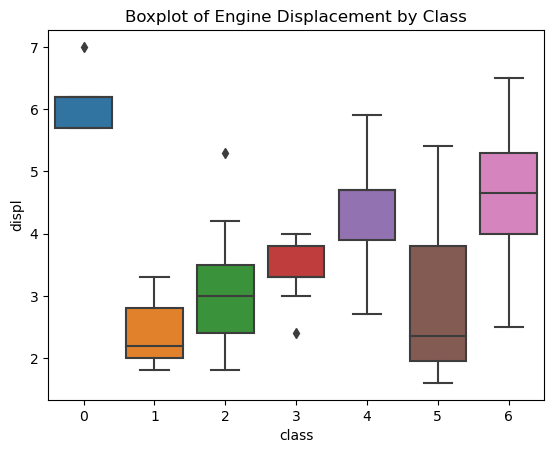

In [75]:
# 5. Visualize engine displacement by each class using boxplot and violinplot
sns.boxplot(x=df['class'], y=df['displ'], data=df)
plt.title('Boxplot of Engine Displacement by Class')
plt.show()

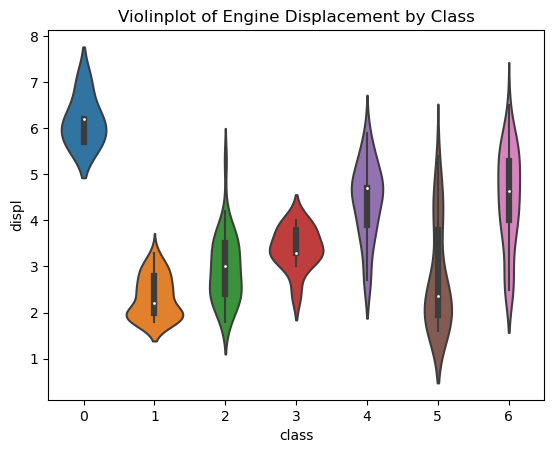

In [74]:
sns.violinplot(x=df['class'], y=df['displ'], data=df)
plt.title('Violinplot of Engine Displacement by Class')
plt.show()